<a href="https://colab.research.google.com/github/JPVillamizarCastillo/TRAINING/blob/main/Parcial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Preparamos el ambiente**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns #Libreria para la gráfica de distribuciones
import random as rnd # Libreria para los números aleatorios
from scipy.stats import skew, kurtosis #coeficiente de asímetria y curtosis

#Para la carga automatica de los datos
from google.colab import drive #Cargar datos desde drive
drive.mount('/content/drive')

# Ruta del archivo
ruta_archivo = '/content/drive/MyDrive/ESTUDIO/UNI/OCTAVO SEMESTRE/Integración de datos y prospectiva/PARCIAL CHALLENGE/3. Perdida Productividad_Zonas(I).xlsx'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## **Cargamos las bases de datos**

In [ ]:
XDBdo = pd.read_excel(nxlo, sheet_name= 0); XDBdo=XDBdo.dropna()
XDBf1 = pd.read_excel(nxlo, sheet_name= 1); XDBf1=XDBf1.dropna()
XDBf2 = pd.read_excel(nxlo, sheet_name= 2); XDBf2=XDBf2.dropna()
XDBf3 = pd.read_excel(nxlo, sheet_name= 3); XDBf3=XDBf3.dropna()
XDBf4 = pd.read_excel(nxlo, sheet_name= 4); XDBf4=XDBf4.dropna()

LDAdo = XDBdo.iloc[:,8]
LDAf1 = XDBf1.iloc[:,8]
LDAf2 = XDBf2.iloc[:,8]
LDAf3 = XDBf3.iloc[:,8]
LDAf4 = XDBf4.iloc[:,8]

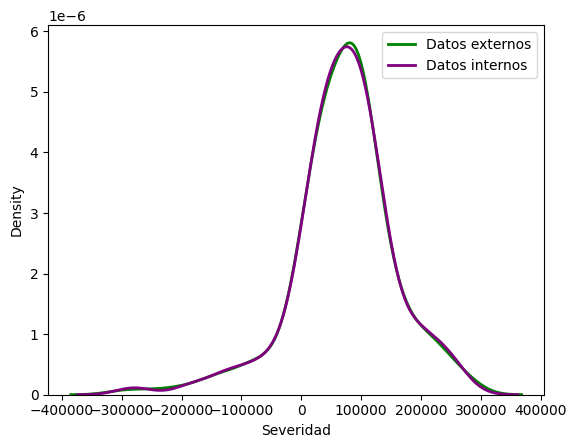

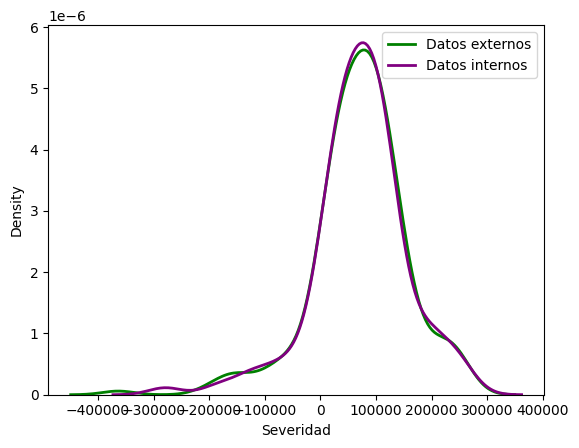

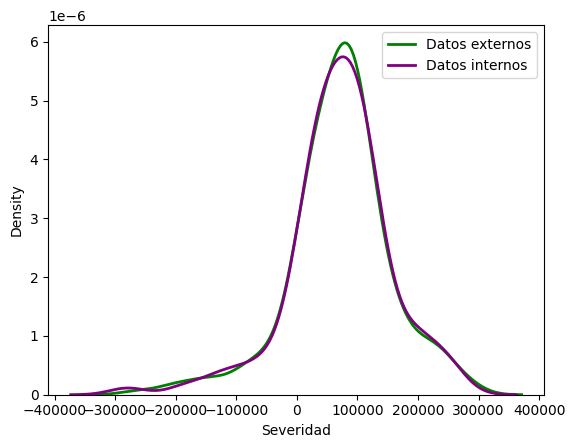

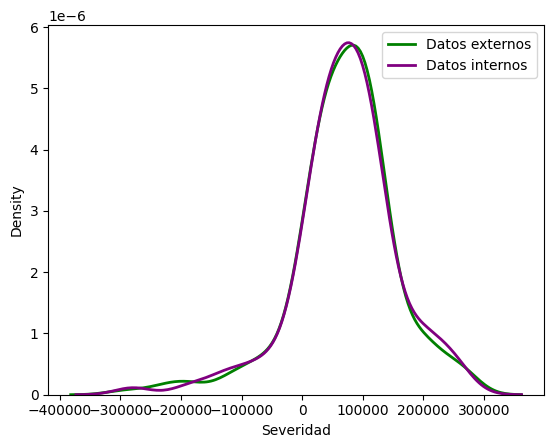

In [ ]:
graficar(LDAdo, LDAf1)
graficar(LDAdo, LDAf2)
graficar(LDAdo, LDAf3)
graficar(LDAdo, LDAf4)

# **Funciones - POO**

In [ ]:
#Función para comparar las distribuciones
def graficar(XLDA, XLDE):
    plt.figure()
    sns.kdeplot(XLDE, color="green", label="Datos externos", linewidth=2)
    sns.kdeplot(XLDA, color="purple", label="Datos internos", linewidth=2)
    plt.legend()
    plt.show()

In [ ]:
#Función para obtener las metricas
def metricas (XLDA):
  u = np.mean(XLDA)
  var = np.var(XLDA)
  stdv = np.sqrt(var)
  cas = skew(XLDA)
  kur = kurtosis(XLDA)

  if abs(cas) < 0.5 and abs(kur) < 0.5:
    tpdist = 'Posible distribución normal'
  elif cas > 0 and abs(kur) > 3:
    if kur >=8:
      tpdist = 'Posible distribución exponencial'
    elif kur >=6:
        tpdist = 'Posible distribución gamma'
    else:
        tpdist = 'Posible distribución Weibull'

  elif cas < 0 and abs(kur) < 3:
    tpdist = 'Posible distribución beta'
  elif kur < 3:
    tpdist = 'Posible distribución uniforme'
  else:
    tpdist = 'No es posible determinar la distribución'

  return u, var, stdv, cas, kur, tpdist

In [ ]:
#Función para realizar el muestreo de los datos
def muestreo (XLDA):
  dfXLDA = pd.DataFrame(XLDA)
  # Se hace el muestreo a 1000 (99,9%)
  LDAoM = dfXLDA.sample(n=1000, replace=True)
  counts, bin_edges = np.histogram(XLDA, bins=10)
  LI = bin_edges[: -1] #Limite inferiores
  LS = bin_edges[1:] #Limites superiores
  mc = (LI + LS) / 2

  TI = LS[0] - LI[0]

  LDAm = np.zeros((1000,1))
  for i in range(1000):
    aleatorio = rnd.random()
    print((aleatorio<cdf))
    intervalo = np.array(np.where((aleatorio < cdf)))
    aleatorio2 = rnd.random()
    LDAm[i] = LI[intervalo[0,0]] + TI * aleatorio2

  return LDAm

In [ ]:
def integracion (XLDA,mdex):

  xint = XLDA #Los datos de integración son los internos
  #Evaluamos los datos externos, con respecto a la estructura interna
  VPoint = np.exp(-0.5*(((xint-mobs[0])/mobs[2])**2))

  #Evaluamos los datos externos con respecto a la estructura externa.
  VPeint = np.exp(-0.5*(((xint-mdex[0])/mdex[2])**2))

  #Donde los datos externos esten por debajo de los datos internos
  filas = np.where(VPeint<=VPoint)[0]
  XDint = XLDA.iloc[filas]
  #Se integran los datos
  LDAo2 = np.concatenate((XLDA,XDint))

  return LDAo2,XDint

In [ ]:
def variacion (XLDA):
  cas_despues = XLDA[3]
  cas_antes = mobs[3]
  var_cas = ((cas_antes-cas_despues)/cas_antes)*100

  kur_despues = XLDA[4]
  kur_antes = mobs[4]
  var_kur = ((kur_antes-kur_despues)/kur_antes)*100

  return var_cas, var_kur

In [ ]:
def Credibilidad(LDAo,LDAe):
  #LDAo: indica los datos observados INTERNOS
  #LDAe: indica los datos observados EXTERNOS
  NDo = len(LDAo); NDe = len(LDAe)
  varo = np.var(LDAo); vare = np.var(LDAe)
  uo = np.mean(LDAo); ue = np.mean(LDAe)

  EPV = (NDo*varo + NDe*vare)/(NDo + NDe)
  MH = (NDo*uo + NDe*ue)/(NDo + NDe)  # Media hipotetica
  Cr = EPV

  pNDo = NDo/(NDe + NDo); pNDe = NDe/(NDo + NDe)
  VHM = pNDo*uo**2 + pNDe*ue**2 # Varianza de los datos con respecto a un punto central o la media hipotetica - que tan alejados estan los datos
  Cr = NDo / (NDo+(EPV/VHM))

  return Cr

## **Aplicación de Monte carlo(99,9%)**

In [ ]:
counts, bin_edges = np.histogram(LDAdo, bins=10)

LI = bin_edges[: -1] #Limite inferiores
LS = bin_edges[1:] #Limites superiores
mc = (LI + LS) / 2 #Mediana de cada intervalo

pdf = counts / sum(counts) # Nos entrega la frecuencia relativa
                           # Porcentaje de datos por intervalo
cdf = np.cumsum(pdf) # Construimos la ruleta
                     # El acumulado de las probabilidades

df = pd.DataFrame(np.column_stack((LI, LS, mc, pdf, cdf)))
df.columns = ['LI', 'LS', 'mc', 'pdf', 'cdf']
df

,LI,LS,mc,pdf,cdf
0,-287897.707677,-231462.455655,-259680.081666,0.008511,0.008511
1,-231462.455655,-175027.203633,-203244.829644,0.008511,0.017021
2,-175027.203633,-118591.951611,-146809.577622,0.017021,0.034043
3,-118591.951611,-62156.699589,-90374.325600,0.025532,0.059574
4,-62156.699589,-5721.447567,-33939.073578,0.051064,0.110638
5,-5721.447567,50713.804455,22496.178444,0.255319,0.365957
6,50713.804455,107149.056477,78931.430466,0.361702,0.727660
7,107149.056477,163584.308499,135366.682488,0.161702,0.889362
8,163584.308499,220019.560522,191801.934511,0.068085,0.957447
9,220019.560522,276454.812544,248237.186533,0.042553,1.000000


La media de los datos es: 71825.7379909532


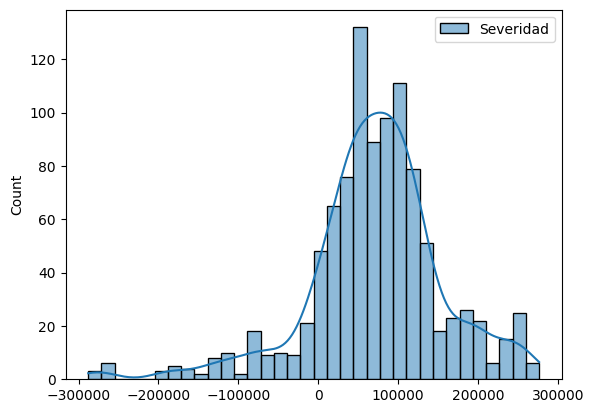

In [ ]:
dfLDAdo = pd.DataFrame(LDAo)
# Se hace el muestreo con 1000 datos (99,9%)
LDAdoM = dfLDAdo.sample(n=1000, replace=True)

media = np.mean(LDAoM)
print('La media de los datos es:',media)

sns.histplot(LDAoM, kde=True)
plt.show()

In [ ]:
LDAm0 = muestreo(LDAo)

[False False False False False False False  True  True  True]
[False False False False False False False  True  True  True]
[False False False False False  True  True  True  True  True]
[False False False False False False  True  True  True  True]
[False False False  True  True  True  True  True  True  True]
[False False False False False False False  True  True  True]
[False False False False False  True  True  True  True  True]
[False False False False False  True  True  True  True  True]
[False False False False False  True  True  True  True  True]
[False False False False False  True  True  True  True  True]
[False False False False False False  True  True  True  True]
[False False False False False  True  True  True  True  True]
[False False False False False False  True  True  True  True]
[False False False False False  True  True  True  True  True]
[False False False False False  True  True  True  True  True]
[False False False False False  True  True  True  True  True]
[False F

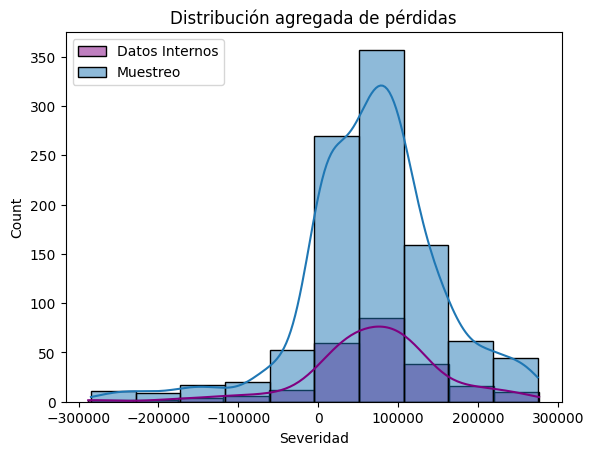

In [ ]:
plt.figure()
sns.histplot(LDAdo, bins=10, kde=True, color='purple', label='Datos Internos')
sns.histplot(LDAm0, bins=10, kde=True, color='blue', label='Muestreo')
plt.title('Distribución agregada de pérdidas')
plt.xlabel('Severidad')
plt.legend()
plt.show()

In [ ]:
## Métricas
mLDAo = metricas(LDAo)

print("La media de los datos internos es:", mLDAo[0])
print("La desviación estandár de los datos internos es:", mLDAo[2])
print("La asimetria de los datos internos es:", mLDAo[3])
print("La kurtosis de los datos internos es:", mLDAo[4])
print("El error es igual a:", (mLDAo[2] /np.sqrt(len(LDAm0))))
print("El tipo de distribución de los datos internos es:",mLDAo[5])


La media de los datos internos es: 70477.61403857844
La desviación estandár de los datos internos es: 84615.08319057657
La asimetria de los datos internos es: -0.7735073509398924
La kurtosis de los datos internos es: 2.5742417404895814
El error es igual a: 2675.7638728684924
El tipo de distribución de los datos internos es: Posible distribución beta


# **Métricas**

## **Datos Internos**

In [ ]:
mobs = metricas(LDAo)

print("La media de los datos internos es:", mobs[0])
print("La desviación estandár de los datos internos es:", mobs[2])
print("La asimetria de los datos internos es:", mobs[3])
print("La kurtosis de los datos internos es:", mobs[4])
print("El tipo de distribución de los datos internos es:",mobs[5])

# Solamente me interesan estos limites, por que me interesan los datos de los limites internos
LS = mobs[0]+2*mobs[2]; LI = mobs[0]-2*mobs[2]
print("El limite superior de los datos internos es:", LS)
print("El limite inferior de los datos internos es:", LI)

La media de los datos internos es: 70477.61403857844
La desviación estandár de los datos internos es: 84615.08319057657
La asimetria de los datos internos es: -0.7735073509398924
La kurtosis de los datos internos es: 2.5742417404895814
El tipo de distribución de los datos internos es: Posible distribución beta
El limite superior de los datos internos es: 239707.78041973157
El limite inferior de los datos internos es: -98752.5523425747


## **Finca 1**

In [ ]:
# Métricas de los datos externos (Finca 1)
mdex1 = metricas(LDAe1)
print("La media de los datos externos es:", mdex1[0])
print("La desviación estandár de los datos externos es:", mdex1[2])
print("La asimetria de los datos externos es:", mdex1[3])
print("La kurtosis de los datos externos es:", mdex1[4])
print("El tipo de distribución de los datos externos es:",mdex1[5])

#Limites externos
LSe1 = mdex1[0]+2*mdex1[2]; LIe1 = mdex1[0]-2*mdex1[2]
print("El limite superior de los datos externos es:", LSe1)
print("El limite inferior de los datos externos es:", LIe1)

La media de los datos externos es: 70427.72941625827
La desviación estandár de los datos externos es: 85237.1708882626
La asimetria de los datos externos es: -0.7662527943070568
La kurtosis de los datos externos es: 2.630188519152629
El tipo de distribución de los datos externos es: Posible distribución beta
El limite superior de los datos externos es: 240902.07119278348
El limite inferior de los datos externos es: -100046.61236026692


## **Finca 2**

In [ ]:
# Métricas de los datos externos(Finca 2)
mdex2 = metricas(LDAe2)
print("La media de los datos externos es:", mdex2[0])
print("La desviación estandár de los datos externos es:", mdex2[2])
print("La asimetria de los datos externos es:", mdex2[3])
print("La kurtosis de los datos externos es:", mdex2[4])
print("El tipo de distribución de los datos externos es:",mdex2[5])

#Limites externos
LSe2 = mdex2[0]+2*mdex2[2]; LIe2 = mdex2[0]-2*mdex2[2]
print("El limite superior de los datos externos es:", LSe2)
print("El limite inferior de los datos externos es:", LIe2)

La media de los datos externos es: 71022.32745331363
La desviación estandár de los datos externos es: 84790.84138764873
La asimetria de los datos externos es: -0.9056007731404699
La kurtosis de los datos externos es: 3.37303144622678
El tipo de distribución de los datos externos es: No es posible determinar la distribución
El limite superior de los datos externos es: 240604.0102286111
El limite inferior de los datos externos es: -98559.35532198384


## **Finca 3**

In [ ]:
# Métricas de los datos externos(Finca 2)
mdex3 = metricas(LDAe3)
print("La media de los datos externos es:", mdex3[0])
print("La desviación estandár de los datos externos es:", mdex3[2])
print("La asimetria de los datos externos es:", mdex3[3])
print("La kurtosis de los datos externos es:", mdex3[4])
print("El tipo de distribución de los datos externos es:",mdex3[5])

#Limites externos
LSe3 = mdex3[0]+2*mdex3[2]; LIe3 = mdex3[0]-2*mdex3[2]
print("El limite superior de los datos externos es:", LSe3)
print("El limite inferior de los datos externos es:", LIe3)

La media de los datos externos es: 71179.23647921723
La desviación estandár de los datos externos es: 83230.08489739992
La asimetria de los datos externos es: -0.581765672612535
La kurtosis de los datos externos es: 2.0828182806987083
El tipo de distribución de los datos externos es: Posible distribución beta
El limite superior de los datos externos es: 237639.40627401706
El limite inferior de los datos externos es: -95280.93331558262


## **Finca 4**

In [ ]:
mdex4 = metricas(LDAe4)
print("La media de los datos externos es:", mdex4[0])
print("La desviación estandár de los datos externos es:", mdex4[2])
print("La asimetria de los datos externos es:", mdex4[3])
print("La kurtosis de los datos externos es:", mdex4[4])
print("El tipo de distribución de los datos externos es:",mdex4[5])

#Limites externos
LSe4 = mdex4[0]+2*mdex4[2]; LIe4 = mdex4[0]-2*mdex4[2]
print("El limite superior de los datos externos es:", LSe4)
print("El limite inferior de los datos externos es:", LIe4)

La media de los datos externos es: 69420.09445849762
La desviación estandár de los datos externos es: 85135.2573637246
La asimetria de los datos externos es: -0.8578270588397582
La kurtosis de los datos externos es: 2.8499357121988718
El tipo de distribución de los datos externos es: Posible distribución beta
El limite superior de los datos externos es: 239690.6091859468
El limite inferior de los datos externos es: -100850.42026895157


# **Integración de datos**

In [ ]:
def grafique (XLDE):
  X = np.linspace(LI, LS, 100)
  VPo = np.exp(-0.5*((X-mobs[0])/mobs[2])**2)
  VPe = np.exp(-0.5*((X-XLDE[0])/XLDE[2])**2)
  plt.figure()
  plt.plot(X, VPo, color = 'blue', label = 'Internos')
  plt.plot(X, VPe, color = 'orange', label = 'Externos')
  plt.legend()
  plt.show()

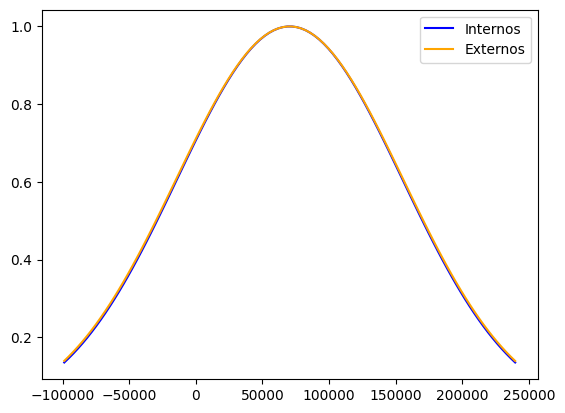

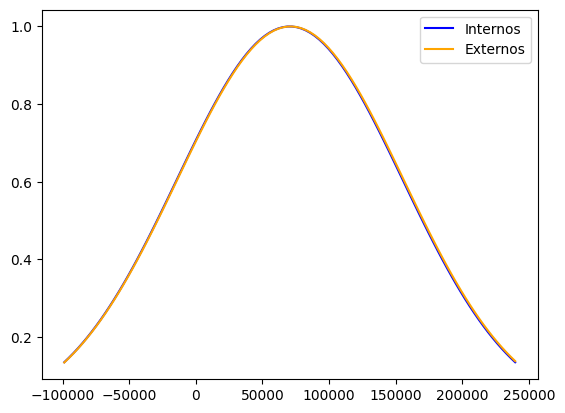

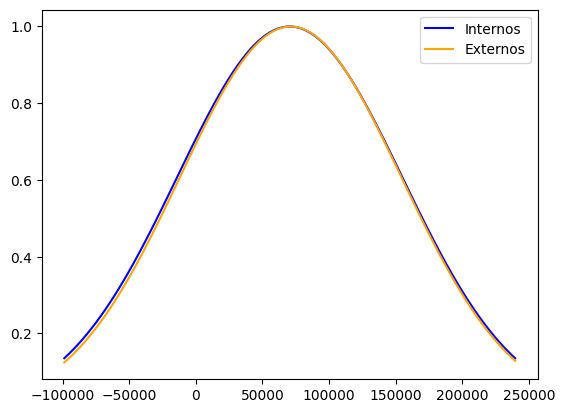

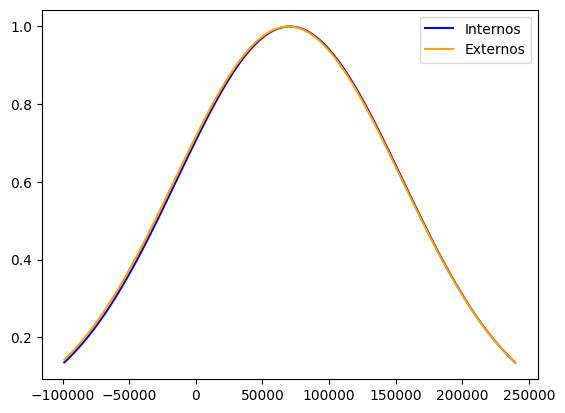

In [ ]:
grafique(mdex1)
grafique(mdex2)
grafique(mdex3)
grafique(mdex4)

In [ ]:
LDAoF1 = integracion(LDAe1,mdex1)
LDAoF2 = integracion(LDAe2, mdex2)
LDAoF3 = integracion(LDAe3, mdex3)
LDAoF4 = integracion(LDAe4, mdex4)

LM=np.concatenate((LDAo,LDAoF1[1]))
LM=np.concatenate((LM,LDAoF2[1]))
LM=np.concatenate((LM,LDAoF3[1]))
LM=np.concatenate((LM,LDAoF4[1]))

LM2=muestreo(LM)
M2 = metricas(LM2)

[False False False False False False False  True  True  True]
[False False False False False False  True  True  True  True]
[False False False False False False  True  True  True  True]
[False False False False  True  True  True  True  True  True]
[False False False False False  True  True  True  True  True]
[False False False False False False  True  True  True  True]
[False False False False  True  True  True  True  True  True]
[False False False False False  True  True  True  True  True]
[False False False False False False False False False  True]
[False False False False False False False False False  True]
[False False False False False False False False  True  True]
[False False False False False False  True  True  True  True]
[False False False False False False False False  True  True]
[False False False False  True  True  True  True  True  True]
[False False False False False  True  True  True  True  True]
[False False False False False False False False False  True]
[False F

In [ ]:
C0 = Credibilidad(LDAo,LDAo)
C1 = Credibilidad(LDAo,LDAoF1[0])
C2 = Credibilidad(LDAo,LDAoF2[0])
C3 = Credibilidad(LDAo,LDAoF3[0])
C4 = Credibilidad(LDAo,LDAoF4[0])
CM = Credibilidad(LDAo,LM2)

In [ ]:
mint1 = metricas(LDAoF1[0])
mint2 = metricas(LDAoF2[0])
mint3 = metricas(LDAoF3[0])
mint4 = metricas(LDAoF4[0])

from tabulate import tabulate
def agrupar_datos():
    datos = {
        "Tipo": ["Datos Internos", "Finca 1", "Finca 2", "Finca 3","Finca 4", "Muestreo"],
        "media": [mobs[0], mint1[0], mint2[0], mint3[0],mint4[0], M2[0]],
        "desviación estandar": [mobs[2], mint1[2], mint2[2], mint3[2],mint4[2],M2[2]],
        "asimetría": [mobs[3], mint1[3], mint2[3], mint3[3],mint4[3],M2[3]],
        "curtosis": [mobs[4], mint1[4], mint2[4], mint3[4],mint4[4],M2[4]],
        "variación asimetría": [0 ,variacion(mint1)[0], variacion(mint2)[0], variacion(mint3)[0],variacion(mint4)[0],variacion(M2)[0]],
        "variación curtosis": [0,variacion(mint1)[1], variacion(mint2)[1], variacion(mint3)[1],variacion(mint4)[1],variacion(M2)[1]],
        "Credibilidad": [C0,C1,C2,C3,C4,CM],
        "tipo de distribución": [mobs[5], mint1[5], mint2[5], mint3[5],mint4[5],M2[5]]
        }


    df = pd.DataFrame(datos)
    return df

# Uso de la función
df_resultante = agrupar_datos()
print(tabulate(df_resultante, headers='keys', tablefmt='grid'))

+----+----------------+---------+-----------------------+-------------+------------+-----------------------+----------------------+----------------+------------------------------------------+
|    | Tipo           |   media |   desviación estandar |   asimetría |   curtosis |   variación asimetría |   variación curtosis |   Credibilidad | tipo de distribución                     |
+====+================+=========+=======================+=============+============+=======================+======================+================+==========================================+
|  0 | Datos Internos | 70477.6 |               84615.1 |   -0.773507 |    2.57424 |              0        |              0       |       0.993904 | Posible distribución beta                |
+----+----------------+---------+-----------------------+-------------+------------+-----------------------+----------------------+----------------+------------------------------------------+
|  1 | Finca 1        | 70525.4 |       

## Se pasa a EXCEL

In [ ]:
!pip install xlsxwriter

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 165.1/165.1 kB 3.2 MB/s eta 0:00:00


In [ ]:
dfLDAoF1 = pd.DataFrame(LM)
dfLDAoF2 = pd.DataFrame(LM2)

import xlsxwriter
with pd.ExcelWriter("multiples_hojas.xlsx", engine="xlsxwriter") as writer:
    dfLDAoF1.to_excel(writer, sheet_name="F1", index=False)
    dfLDAoF2.to_excel(writer, sheet_name="F2", index=False)
    df_resultante.to_excel(writer, sheet_name="Métricas", index=False)

# **Análisis de resultados**
La empresa palmicultora enfrenta diferencias significativas en la distribución de datos internos y externos, lo que sugiere que los riesgos de pérdida de productividad varían a nivel corporativo y en cada finca. Inicialmente, la base de datos interna cuenta con 235 registros, y tras la integración con los datos de las fincas, se obtiene una base consolidada de 446 datos. Posteriormente, se aplica un muestreo mediante el método de Monte Carlo, ampliando la muestra a 1,000 datos.

La empresa palmicultora presenta diferencias significativas en la distribución de datos internos y externos, reflejando variaciones en la pérdida de productividad. La base interna tiene una media de 3,770,380 con una alta desviación estándar de 4,984,660, indicando una gran variabilidad. En contraste, Finca 2 registra la mayor productividad con una media de 4,545,210, mientras que Finca 4 muestra la mayor inestabilidad, con una asimetría de -0.4647 y la mayor variación en asimetría (158.324) y curtosis (-135.246), sugiriendo eventos extremos en su distribución.

También, es posible ver que en su mayoria da 99%, lo cual indica que los datos internos son muy confiables y no es necesario hacer una integración de datos.

Es fundamental implementar estrategias diferenciadas de gestión del riesgo para cada finca, ya que cada una presenta niveles de riesgo distintos. Al desarrollar estrategias específicas, se pueden abordar las particularidades de cada finca de manera más precisa, lo que permitirá optimizar la productividad y mejorar la toma de decisiones.